# Image Augmentation Experiments

We apply selected transformations described in the [Torchvision Transformers Documentation](https://pytorch.org/vision/stable/transforms.html) to a set of 5 randomly selected images from the RSICD dataset and observe their effects.

The 5 images were manually copied from `gs://clip_rsicd/rsicd_dataset/images_of_RSICD_images_rar/` cloud storage.

This would provide input on what transforms we should add to our pipeline as described in the `Transform` class in the [training script](https://github.com/arampacha/CLIP-rsicd/blob/master/flax_clip_training_wip.py#L208).

Note that we focus only on the Random transforms since we want to do inline image augmentation. The transform pipeline will need to have transforms that are mandatory such as `ToTensor` or mandated by the application such as `Normalize` or `ConvertImageDType`, as well as nice to have for data quality such as `CenterCrop`.

In [1]:
import matplotlib.pyplot as plt
import os
import torch
import torchvision

from PIL import Image
from torchvision import transforms, utils

%matplotlib inline

In [2]:
DATA_DIR = "../data"

In [3]:
image_fns = os.listdir(DATA_DIR)
image_fns

['airport_54.jpg',
 'mediumresidential_88.jpg',
 'meadow_90.jpg',
 'river_8.jpg',
 'resort_73.jpg']

## Original Images

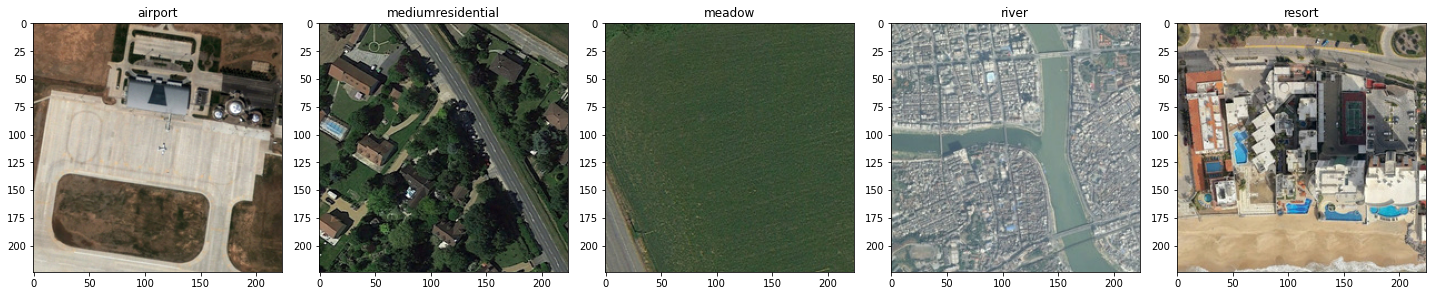

In [4]:
def named_image_list(fns):
    images = []
    for fn in fns:
        image = Image.fromarray(
            plt.imread(os.path.join(DATA_DIR, fn)))
        images.append((fn, image))
    return images


def display_images(named_images):
    plt.figure(figsize=(20, 10))
    for i, (fn, image) in enumerate(named_images):
        plt.subplot(1, len(named_images), i+1)
        title = fn.split("_")[0]
        plt.imshow(image)
        plt.title(title)
    plt.tight_layout()
    plt.show()


named_images = named_image_list(image_fns)
display_images(named_images)

## RandomCrop

Random Crops should include 80% of the original (so we don't lose too much information).

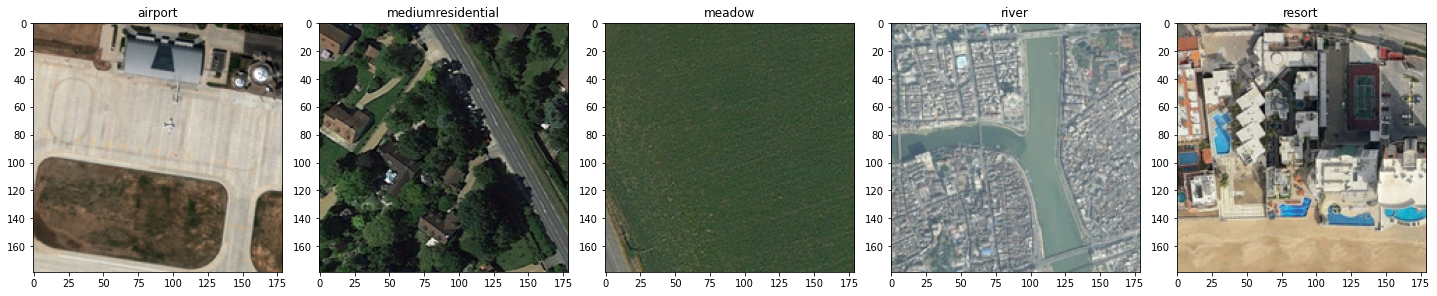

In [5]:
size = int(224 * 0.8)
random_crop = transforms.Compose([
    transforms.RandomCrop(size)
])


def transform_named_images(named_images, transform):
    fns = [fn for fn, image in named_images]
    orig_images = [image for fn, image in named_images]
    transformed_images = [transform(image) for image in orig_images]
    transformed_named_images = [(fn, image) for fn, image in zip(fns, transformed_images)]
    return transformed_named_images


transformed_named_images = transform_named_images(named_images, random_crop)
display_images(transformed_named_images)

## ColorJitter

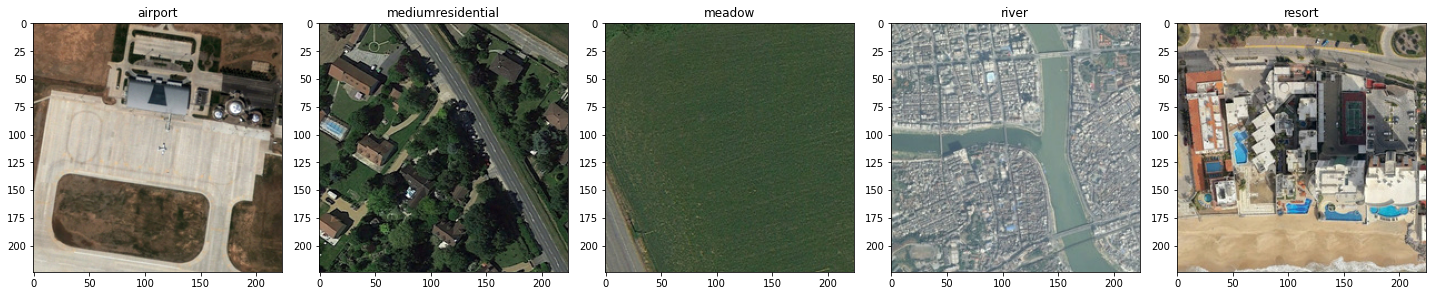

In [6]:
color_jitter = transforms.Compose([
    transforms.ColorJitter()
])

transformed_named_images = transform_named_images(named_images, color_jitter)
display_images(transformed_named_images)

## RandomHorizontalFlip

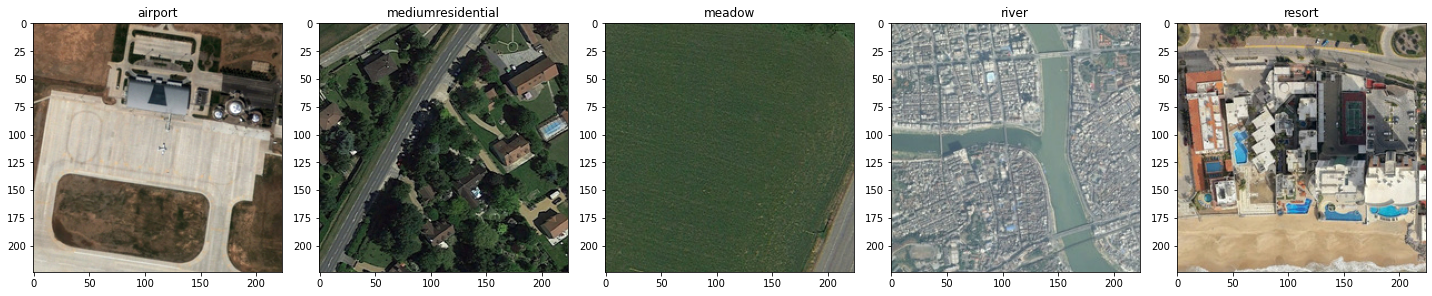

In [7]:
random_hflip = transforms.Compose([
    transforms.RandomHorizontalFlip()
])

transformed_named_images = transform_named_images(named_images, random_hflip)
display_images(transformed_named_images)

## RandomVerticalFlip

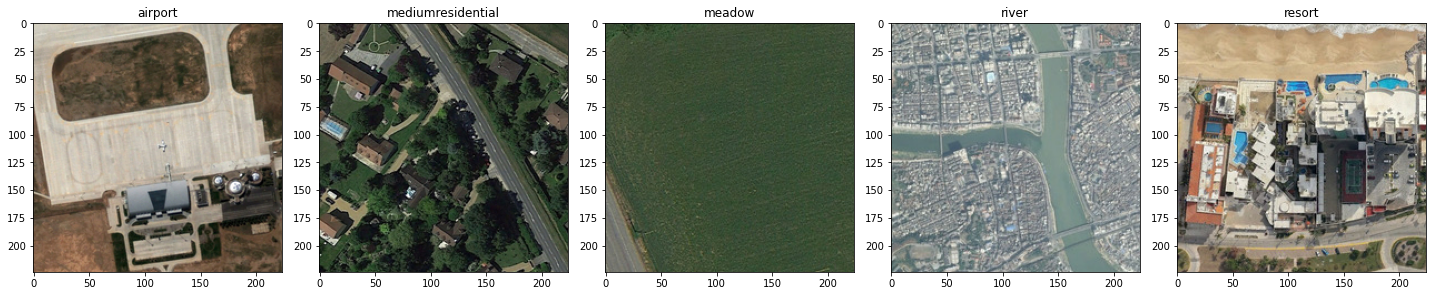

In [8]:
random_vflip = transforms.Compose([
    transforms.RandomVerticalFlip()
])

transformed_named_images = transform_named_images(named_images, random_vflip)
display_images(transformed_named_images)

## RandomResizedCrop

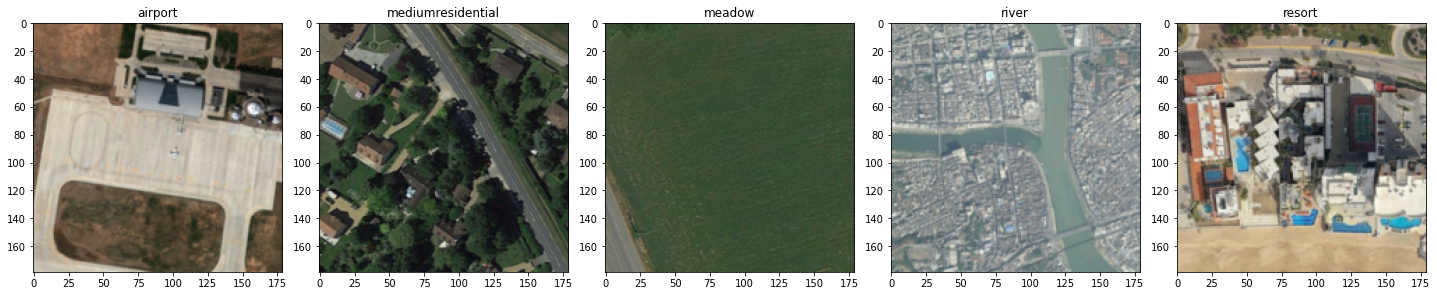

In [9]:
random_resize_crop = transforms.Compose([
    transforms.RandomResizedCrop(size, scale=(0.8, 1.2), ratio=(1, 1))
])

transformed_named_images = transform_named_images(named_images, random_resize_crop)
display_images(transformed_named_images)

## RandomAdjustSharpness

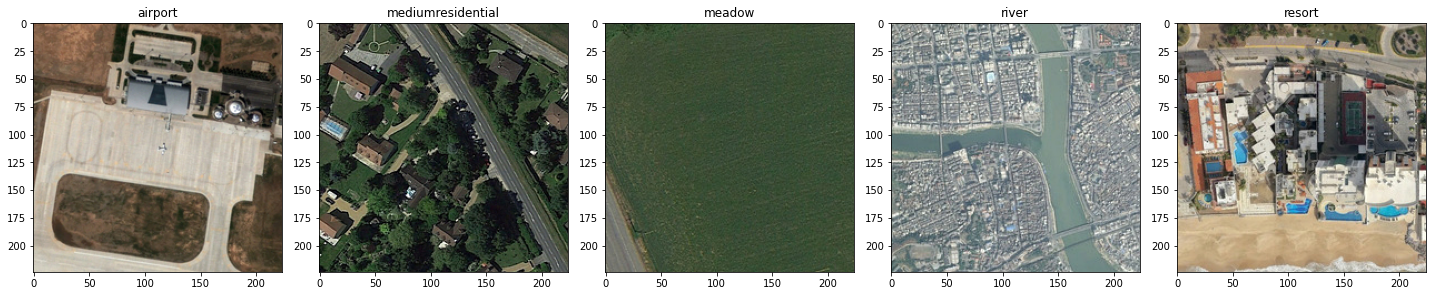

In [10]:
random_sharpify = transforms.Compose([
    transforms.RandomAdjustSharpness(1.5)
])

transformed_named_images = transform_named_images(named_images, random_sharpify)
display_images(transformed_named_images)

## All Together

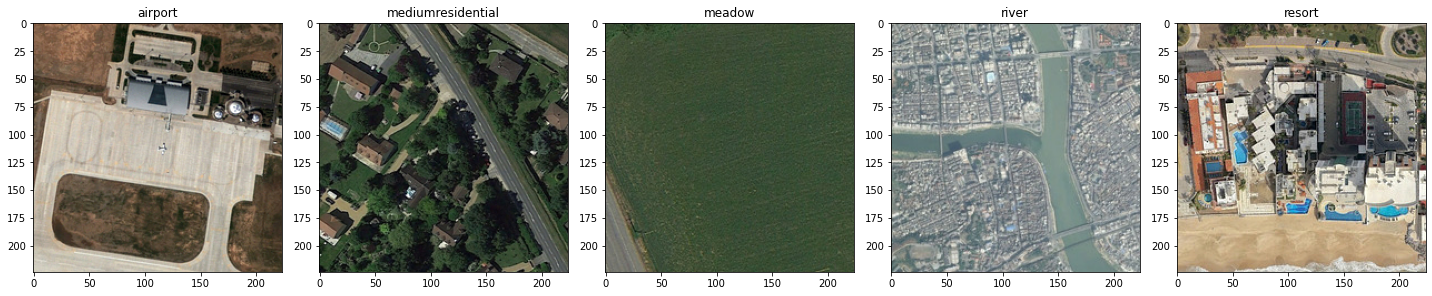

In [11]:
composed = transforms.Compose([
    transforms.RandomCrop(size),
    transforms.ColorJitter(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomResizedCrop(size, scale=(0.8, 1.2), ratio=(1, 1)),
    transforms.RandomAdjustSharpness(1.5)
])

transformed_named_images = transform_named_images(named_images, random_sharpify)
display_images(transformed_named_images)